<a href="https://colab.research.google.com/github/KPrabhu711/GemStone_Price_Predictor/blob/main/nexus_gems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load data set


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("colearninglounge/gemstone-price-prediction")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/colearninglounge/gemstone-price-prediction/versions/2


In [ ]:
df = pd.read_csv("/root/.cache/kagglehub/datasets/colearninglounge/gemstone-price-prediction/versions/2/cubic_zirconia.csv")  # Replace with your file name


# Explore data set


In [ ]:
print(df.head())

   Unnamed: 0  carat        cut color clarity  depth  table     x     y     z  \
0           1   0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66   
1           2   0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70   
2           3   0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78   
3           4   0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96   
4           5   0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65   

   price  
0    499  
1    984  
2   6289  
3   1082  
4    779  


In [ ]:
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB
None


In [ ]:
print(df.describe())

         Unnamed: 0         carat         depth         table             x  \
count  26967.000000  26967.000000  26270.000000  26967.000000  26967.000000   
mean   13484.000000      0.798375     61.745147     57.456080      5.729854   
std     7784.846691      0.477745      1.412860      2.232068      1.128516   
min        1.000000      0.200000     50.800000     49.000000      0.000000   
25%     6742.500000      0.400000     61.000000     56.000000      4.710000   
50%    13484.000000      0.700000     61.800000     57.000000      5.690000   
75%    20225.500000      1.050000     62.500000     59.000000      6.550000   
max    26967.000000      4.500000     73.600000     79.000000     10.230000   

                  y             z         price  
count  26967.000000  26967.000000  26967.000000  
mean       5.733569      3.538057   3939.518115  
std        1.166058      0.720624   4024.864666  
min        0.000000      0.000000    326.000000  
25%        4.710000      2.900000    9

In [ ]:
print(df.isnull().sum())  #identify missing values


Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64


In [ ]:
imputer = SimpleImputer(strategy="mean")  # You can use "median" or "most_frequent"
df['depth'] = imputer.fit_transform(df[['depth']]) #impute the missing values in depth collumn


# Part 3: Removing Duplicate Rows

In [ ]:
# Removing duplicates based on all columns
df_no_duplicates = df.drop_duplicates()
print(df_no_duplicates.info())
df=df_no_duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26967 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB
None


# Label Encoding



In [ ]:
df_backup = df.copy()


Output Mapping:

    Fair: 0
    Good: 1
    Very Good: 2
    Premium: 3
    Ideal: 4

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define the order of the categories
ordered_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

# Convert the column to a Categorical type with the specified order
df['cut'] = pd.Categorical(df['cut'], categories=ordered_categories, ordered=True)

# Apply Label Encoding
le = LabelEncoder()
df['cut'] = le.fit_transform(df['cut'])

# Display the result
print(df)

       Unnamed: 0  carat  cut color clarity  depth  table     x     y     z  \
0               1   0.30    2     E     SI1   62.1   58.0  4.27  4.29  2.66   
1               2   0.33    3     G      IF   60.8   58.0  4.42  4.46  2.70   
2               3   0.90    4     E    VVS2   62.2   60.0  6.04  6.12  3.78   
3               4   0.42    2     F     VS1   61.6   56.0  4.82  4.80  2.96   
4               5   0.31    2     F    VVS1   60.4   59.0  4.35  4.43  2.65   
...           ...    ...  ...   ...     ...    ...    ...   ...   ...   ...   
26962       26963   1.11    3     G     SI1   62.3   58.0  6.61  6.52  4.09   
26963       26964   0.33    2     H      IF   61.9   55.0  4.44  4.42  2.74   
26964       26965   0.51    3     E     VS2   61.7   58.0  5.12  5.15  3.17   
26965       26966   0.27    4     F    VVS2   61.8   56.0  4.19  4.20  2.60   
26966       26967   1.25    3     J     SI1   62.0   58.0  6.90  6.88  4.27   

       price  
0        499  
1        984  
2     

In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  int64  
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26967 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 2.3+ MB
None
         Unnamed: 0         carat           cut         depth         table  \
count  26967.000000  26967.000000  26967.000000  26967.000000  26967.000000   
mean   13484.000000      0.798375      2.554604     61.745147     57.456080   
std     7784.846691      0.477745      1.024243      1

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Define the order of the categories defghij
ordered_categories = ['J', 'I', 'H', 'G', 'F', 'E', 'D']

# Convert the column to a Categorical type with the specified order
df['color'] = pd.Categorical(df['color'], categories=ordered_categories, ordered=True)

# Apply Label Encoding
le = LabelEncoder()
df['color'] = le.fit_transform(df['color'])

# Display the result
print(df)


       Unnamed: 0  carat  cut  color clarity  depth  table     x     y     z  \
0               1   0.30    2      1     SI1   62.1   58.0  4.27  4.29  2.66   
1               2   0.33    3      3      IF   60.8   58.0  4.42  4.46  2.70   
2               3   0.90    4      1    VVS2   62.2   60.0  6.04  6.12  3.78   
3               4   0.42    2      2     VS1   61.6   56.0  4.82  4.80  2.96   
4               5   0.31    2      2    VVS1   60.4   59.0  4.35  4.43  2.65   
...           ...    ...  ...    ...     ...    ...    ...   ...   ...   ...   
26962       26963   1.11    3      3     SI1   62.3   58.0  6.61  6.52  4.09   
26963       26964   0.33    2      4      IF   61.9   55.0  4.44  4.42  2.74   
26964       26965   0.51    3      1     VS2   61.7   58.0  5.12  5.15  3.17   
26965       26966   0.27    4      2    VVS2   61.8   56.0  4.19  4.20  2.60   
26966       26967   1.25    3      6     SI1   62.0   58.0  6.90  6.88  4.27   

       price  
0        499  
1        

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Define the reverse order of clarity levels (from worst to best)
reversed_clarity = ['I3', 'I2', 'I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF', 'FL']

# Convert the clarity column to a categorical type with the specified reverse order
df['clarity'] = pd.Categorical(df['clarity'], categories=reversed_clarity, ordered=True)

# Apply Label Encoding
le = LabelEncoder()
df['clarity'] = le.fit_transform(df['clarity'])

# Display the result
print(df)


       Unnamed: 0  carat  cut  color  clarity  depth  table     x     y     z  \
0               1   0.30    2      1        2   62.1   58.0  4.27  4.29  2.66   
1               2   0.33    3      3        1   60.8   58.0  4.42  4.46  2.70   
2               3   0.90    4      1        7   62.2   60.0  6.04  6.12  3.78   
3               4   0.42    2      2        4   61.6   56.0  4.82  4.80  2.96   
4               5   0.31    2      2        6   60.4   59.0  4.35  4.43  2.65   
...           ...    ...  ...    ...      ...    ...    ...   ...   ...   ...   
26962       26963   1.11    3      3        2   62.3   58.0  6.61  6.52  4.09   
26963       26964   0.33    2      4        1   61.9   55.0  4.44  4.42  2.74   
26964       26965   0.51    3      1        5   61.7   58.0  5.12  5.15  3.17   
26965       26966   0.27    4      2        7   61.8   56.0  4.19  4.20  2.60   
26966       26967   1.25    3      6        2   62.0   58.0  6.90  6.88  4.27   

       price  
0        499

# Part 5: Handling Outliers Using IQR

In [ ]:


# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile Range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

# Specify columns and remove outliers
columns_to_check = ['price']
df_cleaned = remove_outliers_iqr(df, columns_to_check)

print("Original DataFrame:")
print(df)
print("\nCleaned DataFrame:")
print(df_cleaned)
df=df_cleaned


Original DataFrame:
       Unnamed: 0  carat  cut  color  clarity  depth  table     x     y     z  \
0               1   0.30    2      1        2   62.1   58.0  4.27  4.29  2.66   
1               2   0.33    3      3        1   60.8   58.0  4.42  4.46  2.70   
2               3   0.90    4      1        7   62.2   60.0  6.04  6.12  3.78   
3               4   0.42    2      2        4   61.6   56.0  4.82  4.80  2.96   
4               5   0.31    2      2        6   60.4   59.0  4.35  4.43  2.65   
...           ...    ...  ...    ...      ...    ...    ...   ...   ...   ...   
26962       26963   1.11    3      3        2   62.3   58.0  6.61  6.52  4.09   
26963       26964   0.33    2      4        1   61.9   55.0  4.44  4.42  2.74   
26964       26965   0.51    3      1        5   61.7   58.0  5.12  5.15  3.17   
26965       26966   0.27    4      2        7   61.8   56.0  4.19  4.20  2.60   
26966       26967   1.25    3      6        2   62.0   58.0  6.90  6.88  4.27   

       

# Standardizing data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Specify columns to standardize
columns_to_standardize = ['carat','depth','table','x','y','z','price','cut','color','clarity']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler only to specified columns
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# Print the updated DataFrame
print("\nData after Standardizing Specified Columns:")
print(df)



Data after Standardizing Specified Columns:
       Unnamed: 0     carat       cut     color   clarity     depth     table  \
0               1 -1.096471 -0.533716 -0.921470 -1.060865  0.251752  0.258864   
1               2 -1.018692  0.441209  0.259730 -1.635870 -0.681524  0.258864   
2               3  0.459102  1.416135 -0.921470  1.814161  0.323543  1.154930   
3               4 -0.785356 -0.533716 -0.330870  0.089145 -0.107200 -0.637202   
4               5 -1.070544 -0.533716 -0.330870  1.239156 -0.968687  0.706897   
...           ...       ...       ...       ...       ...       ...       ...   
26962       26963  1.003553  0.441209  0.259730 -1.060865  0.395333  0.258864   
26963       26964 -1.018692 -0.533716  0.850330 -1.635870  0.108171 -1.085235   
26964       26965 -0.552020  0.441209 -0.921470  0.664151 -0.035410  0.258864   
26965       26966 -1.174249  1.416135 -0.330870  1.814161  0.036381 -0.637202   
26966       26967  1.366520  0.441209  2.031529 -1.060865  0.179

<ipython-input-129-1de12c146451>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])


# Linear Regression

Model Evaluation:
Mean Squared Error (MSE): 0.12
Mean Absolute Error (MAE): 0.23
R² Score: 0.87


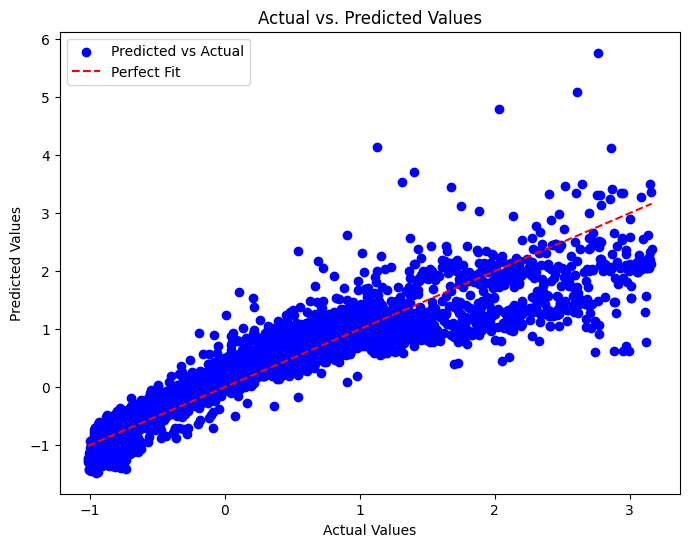

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


# Split data into features (X) and target (y)
X = df[['carat','cut','color','clarity','depth','table','x','y','z']]
y = df['price']



# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualize actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


Polynomial Regression

Polynomial Regression Model Evaluation:
Mean Squared Error (MSE): 0.07
Mean Absolute Error (MAE): 0.16
R² Score: 0.93


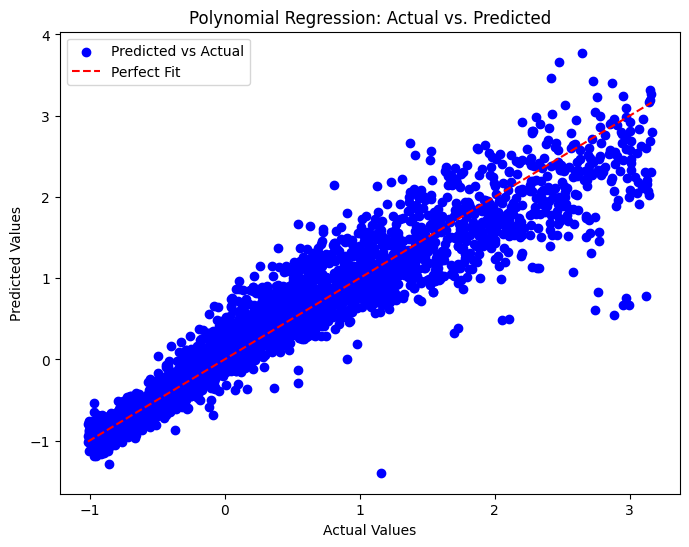

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize PolynomialFeatures with degree 2 (for quadratic, change degree as needed)
poly = PolynomialFeatures(degree=2)

# Transform the features to polynomial features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train a Linear Regression model on the polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Polynomial Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualize actual vs. predicted values (if needed)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Regression: Actual vs. Predicted')
plt.legend()
plt.show()


In [ ]:
df.describe()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
count,25188.000000,2.518800e+04,2.518800e+04,2.518800e+04,2.518800e+04,2.518800e+04,2.518800e+04,2.518800e+04,2.518800e+04,2.518800e+04,2.518800e+04
mean,13479.219192,-3.596721e-17,-1.071964e-17,-2.552966e-17,2.418971e-17,-1.104405e-15,-1.130745e-15,-5.943757e-16,-2.908407e-16,-2.060709e-16,-4.499427e-17
std,7784.505196,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00
min,1.000000,-1.355733e+00,-2.483567e+00,-1.512069e+00,-2.210876e+00,-7.860577e+00,-3.773433e+00,-5.576295e+00,-5.622355e+00,-5.334173e+00,-1.015933e+00
25%,6723.750000,-8.890608e-01,-5.337163e-01,-9.214697e-01,-1.060865e+00,-4.661529e-01,-6.372019e-01,-9.187128e-01,-9.184282e-01,-8.917854e-01,-8.080511e-01
50%,13486.500000,-1.890530e-01,-5.337163e-01,2.597298e-01,8.914545e-02,3.638080e-02,-1.891689e-01,-1.917974e-02,-3.203509e-02,-5.593546e-02,-3.703853e-01
75%,20206.250000,7.442907e-01,4.412091e-01,8.503295e-01,6.641507e-01,5.389145e-01,7.068971e-01,8.503689e-01,8.543581e-01,8.418293e-01,5.444403e-01
max,26967.000000,5.929533e+00,1.416135e+00,2.031529e+00,1.814161e+00,8.507663e+00,9.667557e+00,3.798838e+00,3.755281e+00,4.388810e+01,3.168999e+00


In [ ]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,-1.096471,-0.533716,-0.92147,-1.060865,0.251752,0.258864,-1.308510,-1.301189,-1.216838,-0.953820
1,2,-1.018692,0.441209,0.25973,-1.635870,-0.681524,0.258864,-1.158588,-1.129954,-1.154923,-0.779687
2,3,0.459102,1.416135,-0.92147,1.814161,0.323543,1.154930,0.460571,0.542106,0.516777,1.125003
3,4,-0.785356,-0.533716,-0.33087,0.089145,-0.107200,-0.637202,-0.758796,-0.787484,-0.752477,-0.744502
4,5,-1.070544,-0.533716,-0.33087,1.239156,-0.968687,0.706897,-1.228552,-1.160172,-1.232317,-0.853290


In [ ]:
df = df.drop('Unnamed: 0', axis=1)


Ridge Regression


Ridge Regression Performance:
Mean Squared Error (MSE): 0.12
Mean Absolute Error (MAE): 0.23
R² Score: 0.87

Optimal Alpha: 3.727593720314938
Best Cross-Validation R² Score: 0.88

Best Ridge Regression Performance:
Mean Squared Error (MSE): 0.12
Mean Absolute Error (MAE): 0.23
R² Score: 0.87


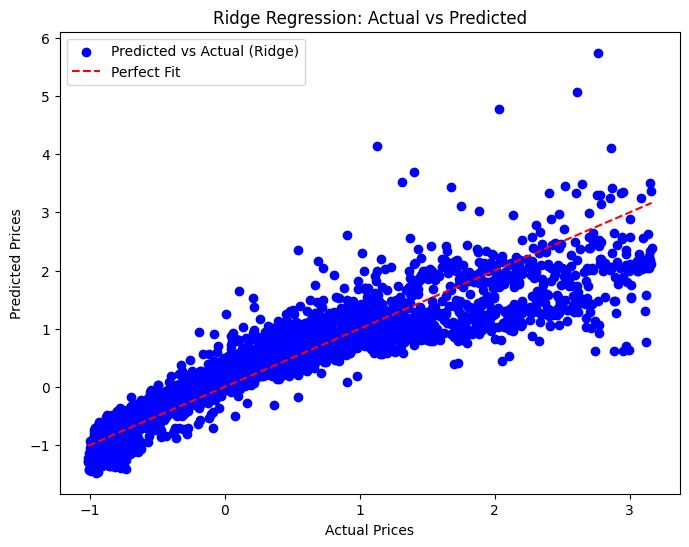

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Ridge Regression
# Default Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluate Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Performance:")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"Mean Absolute Error (MAE): {mae_ridge:.2f}")
print(f"R² Score: {r2_ridge:.2f}")

# 5. Cross-Validation for Optimal Alpha
param_grid = {'alpha': np.logspace(-4, 4, 50)}  # Test various alpha values
ridge_cv = GridSearchCV(Ridge(), param_grid, scoring='r2', cv=5)  # 5-fold CV
ridge_cv.fit(X_train, y_train)

# Best Alpha and Model
best_alpha = ridge_cv.best_params_['alpha']
best_ridge = ridge_cv.best_estimator_
y_pred_ridge_cv = best_ridge.predict(X_test)

print(f"\nOptimal Alpha: {best_alpha}")
print(f"Best Cross-Validation R² Score: {ridge_cv.best_score_:.2f}")

# Evaluate Best Ridge Model
mse_ridge_cv = mean_squared_error(y_test, y_pred_ridge_cv)
mae_ridge_cv = mean_absolute_error(y_test, y_pred_ridge_cv)
r2_ridge_cv = r2_score(y_test, y_pred_ridge_cv)

print("\nBest Ridge Regression Performance:")
print(f"Mean Squared Error (MSE): {mse_ridge_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_ridge_cv:.2f}")
print(f"R² Score: {r2_ridge_cv:.2f}")

# 7. Visualize Ridge Regression Predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge_cv, color='blue', label='Predicted vs Actual (Ridge)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Ridge Regression: Actual vs Predicted')
plt.legend()
plt.show()


Lasso


Lasso Regression Performance:
Optimal Alpha: 0.0002559547922699536
Mean Squared Error (MSE): 0.12
Mean Absolute Error (MAE): 0.23
R² Score: 0.87

Feature Coefficients from Lasso Regression:
carat      1.182187
cut        0.017791
color     -0.116360
clarity    0.144658
depth     -0.045349
table     -0.053731
x         -0.540016
y          0.353267
z         -0.001609
dtype: float64

Selected Features:
Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

Model Comparison:
Linear Regression R²: 0.87
Ridge Regression R²: 0.87
Lasso Regression R²: 0.87


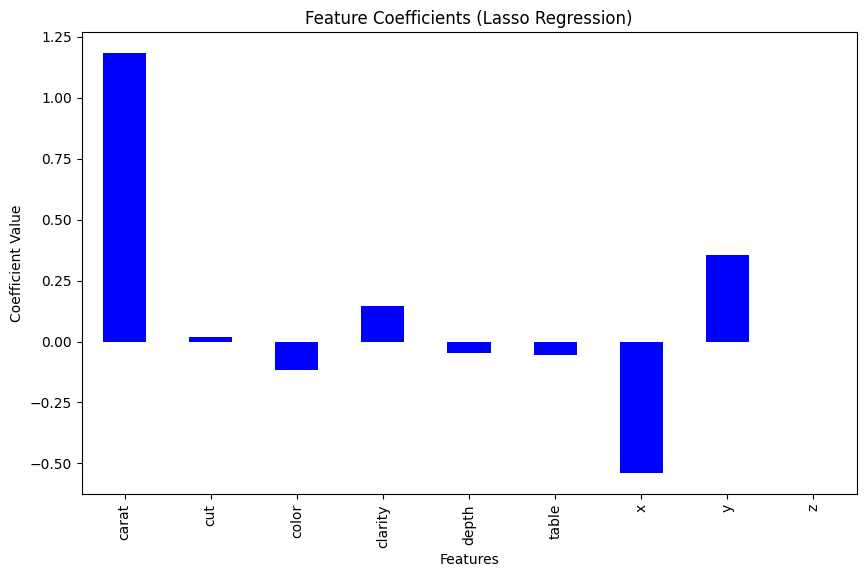

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# 1. Train Lasso Regression Model with Cross-Validation
param_grid = {'alpha': np.logspace(-4, 1, 50)}  # Test various alpha values
lasso_cv = GridSearchCV(Lasso(max_iter=10000), param_grid, scoring='r2', cv=5)  # 5-fold cross-validation
lasso_cv.fit(X_train, y_train)

# Best Lasso Model
best_alpha = lasso_cv.best_params_['alpha']
lasso_best = lasso_cv.best_estimator_
y_pred_lasso = lasso_best.predict(X_test)

# Evaluate Lasso Regression Performance
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression Performance:")
print(f"Optimal Alpha: {best_alpha}")
print(f"Mean Squared Error (MSE): {mse_lasso:.2f}")
print(f"Mean Absolute Error (MAE): {mae_lasso:.2f}")
print(f"R² Score: {r2_lasso:.2f}")

# 2. Investigate Feature Selection
coefficients = pd.Series(lasso_best.coef_, index=X.columns)
print("\nFeature Coefficients from Lasso Regression:")
print(coefficients)

selected_features = coefficients[coefficients != 0].index
print("\nSelected Features:")
print(selected_features)

# 3. Compare with Linear and Ridge Regression
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)

# Ridge Regression
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nModel Comparison:")
print(f"Linear Regression R²: {r2_linear:.2f}")
print(f"Ridge Regression R²: {r2_ridge:.2f}")
print(f"Lasso Regression R²: {r2_lasso:.2f}")

# 4. Visualize Feature Coefficients
plt.figure(figsize=(10, 6))
coefficients.plot(kind='bar', color='blue')
plt.title('Feature Coefficients (Lasso Regression)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()


Gradient Boost


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# 1. Implement Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()

# 2. Hyperparameter tuning using smaller GridSearchCV
param_grid = {
    'n_estimators': [100],  # Use fewer estimators
    'learning_rate': [0.1],  # Choose one learning rate for faster testing
    'max_depth': [3],  # Try just one depth
}

grid_search = GridSearchCV(gb_regressor, param_grid, cv=3, scoring='r2')  # Reduce folds to 3 for faster results
grid_search.fit(X_train, y_train)

# Best model from grid search
best_gb_model = grid_search.best_estimator_

# 3. Predictions and evaluation
y_pred_gb = best_gb_model.predict(X_test)

# Evaluate Gradient Boosting Model
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)

print("Gradient Boosting Performance:")
print(f"Optimal Parameters: {grid_search.best_params_}")
print(f"MSE: {mse_gb:.2f}, RMSE: {rmse_gb:.2f}, MAE: {mae_gb:.2f}, R²: {r2_gb:.2f}")


Gradient Boosting Performance:
Optimal Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
MSE: 0.03, RMSE: 0.17, MAE: 0.10, R²: 0.97


random regressor


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler


# 1. Implement Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# 2. Hyperparameter tuning using GridSearchCV with reduced search space
param_grid_rf = {
    'n_estimators': [100],  # Use fewer trees for quick testing
    'max_depth': [10],  # Reduce the depth of trees
    'min_samples_split': [2],  # Keep min_samples_split as 2
    'min_samples_leaf': [1],  # Keep min_samples_leaf as 1
}

grid_search_rf = GridSearchCV(rf_regressor, param_grid_rf, cv=3, scoring='r2')  # Reduce folds to 3
grid_search_rf.fit(X_train, y_train)

# Best model from grid search
best_rf_model = grid_search_rf.best_estimator_

# 3. Predictions and evaluation
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate Random Forest Model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("Random Forest Performance:")
print(f"Optimal Parameters: {grid_search_rf.best_params_}")
print(f"MSE: {mse_rf:.2f}, RMSE: {rmse_rf:.2f}, MAE: {mae_rf:.2f}, R²: {r2_rf:.2f}")


Random Forest Performance:
Optimal Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
MSE: 0.02, RMSE: 0.15, MAE: 0.09, R²: 0.98


compare


               Model       MSE      RMSE       MAE        R²
0  Linear Regression  0.068321  0.261384  0.161787  0.928830
1   Ridge Regression  0.122430  0.349900  0.232699  0.872443
2   Lasso Regression  0.122400  0.349857  0.232573  0.872497
3  Gradient Boosting  0.027814  0.166776  0.098456  0.971026
4      Random Forest  0.021694  0.147290  0.086773  0.977401


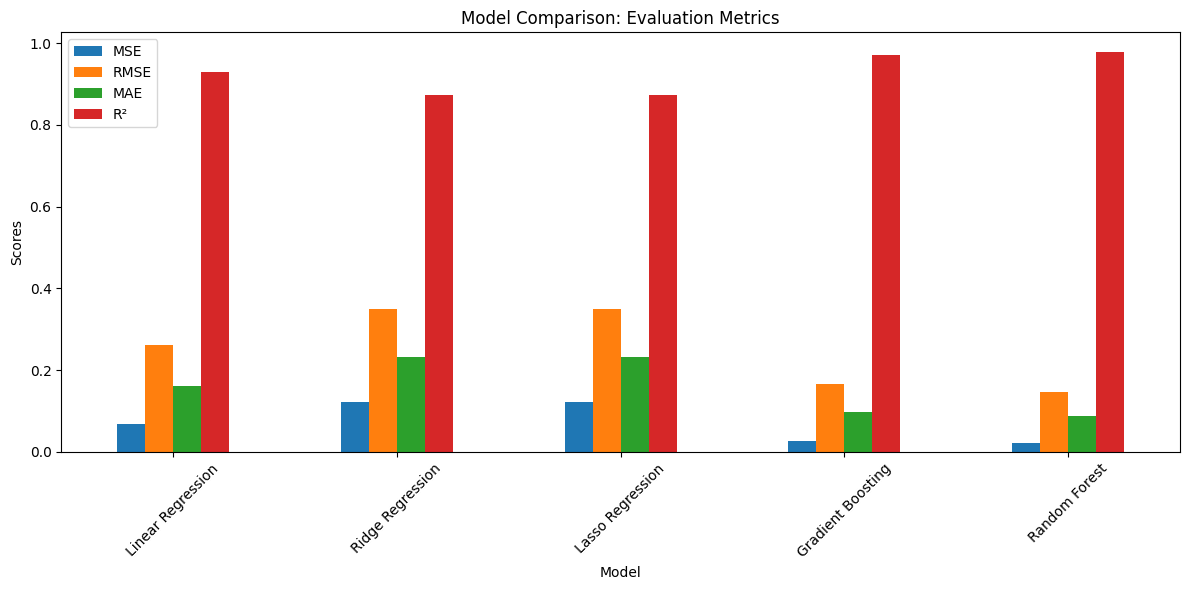

In [ ]:
# Create a DataFrame to store evaluation results
model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Gradient Boosting', 'Random Forest'],
    'MSE': [mse, mse_ridge, mse_lasso, mse_gb, mse_rf],
    'RMSE': [np.sqrt(mse), np.sqrt(mse_ridge), np.sqrt(mse_lasso), rmse_gb, rmse_rf],
    'MAE': [mae, mae_ridge, mae_lasso, mae_gb, mae_rf],
    'R²': [r2, r2_ridge, r2_lasso, r2_gb, r2_rf]
})

# Print model comparison
print(model_comparison)

# Visualize model comparison using bar chart
model_comparison.set_index('Model')[['MSE', 'RMSE', 'MAE', 'R²']].plot(kind='bar', figsize=(12, 6))
plt.title('Model Comparison: Evaluation Metrics')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
